(34, 8414)
[1015 1006 1016]
[1002 1003 1005 1009 1010 1011 1013 1020]
(3, 845)


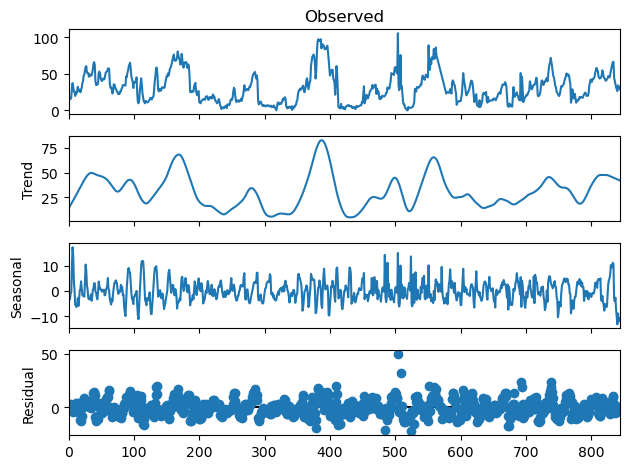

In [11]:
from sklearn import preprocessing
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import os


data_path = './data'
scaler = preprocessing.MinMaxScaler(feature_range=(0,200))
air_quality_data = pd.read_csv('{}/airquality.csv'.format(data_path), nrows=278023)

# remove data from 1022 that with lot of null data
air_quality_data = air_quality_data[air_quality_data['station_id'] != 1022]
columns = ['PM25_Concentration', 'PM10_Concentration',
            'NO2_Concentration', 'CO_Concentration',
            'O3_Concentration', 'SO2_Concentration']
# pivot the data
pivot_air_data = air_quality_data.pivot(index='time', columns='station_id', values=columns)
# linear interpolate to fill the loss value
pivot_air_data1 = pivot_air_data.interpolate(method='linear').dropna()

air_quality_data = pivot_air_data1.stack(level=1).reset_index().sort_values(by=['station_id', 'time'])
input_data = []
index = []
#print(np.array(air_quality_data[(air_quality_data['station_id'] == 1001)].loc[:,'PM25_Concentration'].values).shape)
for i in range(1001,1036):
    #input_data.append(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time'], axis=1).values))
    if i!=1022:
        index.append(i)
        input_data.append(np.array(air_quality_data[(air_quality_data.station_id == i)].loc[:,'PM25_Concentration'].values))
input_data = np.array(input_data)
print(input_data.shape)
corr = np.corrcoef(input_data)
#print(np.corrcoef(input_data))
dataframe = pd.DataFrame(corr,index=index,columns=index)
#dataframe.to_csv('corr.csv')
labels = (dataframe.mean(axis=0).sort_values(ascending=False)).iloc[:3]
labels_index = np.array(labels.index)
preds_index = []
#print(dataframe[>0.8])
print(labels_index)
for i in labels_index:
    dt = dataframe.loc[i]
    dt_index = np.array(dt[(dt>0.8) & (dt<1)].sort_values(ascending=False).index)[:4]
    preds_index.extend(dt_index)

preds_index = np.array(preds_index).reshape(-1)
preds_index = np.sort(preds_index)
for i in range(len(labels_index)):
    preds_index = np.delete(preds_index,np.where(preds_index==labels_index[i]))
preds_index = np.unique(preds_index)
print(preds_index)

input_data = []
label_data = []
for i in preds_index:
#for i in range(1018,1036):
    #input_data.append(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time'], axis=1).values))
    if i !=1022:
        input_data.append(scaler.fit_transform(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time'], axis=1).values)))
for i in labels_index:
    if i !=1022:
        label_data.append(scaler.fit_transform(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time','PM10_Concentration','NO2_Concentration', 'CO_Concentration',
            'O3_Concentration', 'SO2_Concentration'], axis=1).values)))

""" for i in range(1018,1036):
    #input_data.append(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time'], axis=1).values))
    if i !=1022:
        input_data.append(scaler.fit_transform(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time'], axis=1).values)))
for i in range(1001,1018):
    if i !=1022:
        label_data.append(scaler.fit_transform(np.array(air_quality_data[(air_quality_data.station_id == i)].drop(['station_id', 'time','PM10_Concentration','NO2_Concentration', 'CO_Concentration',
            'O3_Concentration', 'SO2_Concentration'], axis=1).values))) """

input_data = np.array(input_data)
label_data = np.array(label_data) 
""" scl2 =  preprocessing.StandardScaler(with_mean=np.mean(input_data[0]),with_std=np.std(input_data[0]))
print(input_data[0])
print(scl2.inverse_transform(input_data[0])) """
input_data = input_data.transpose(1,0,2)
label_data = label_data.transpose(1,0,2)
enstep = 6
destep = 1
steps = 1
x = []
y = []
tx = []
ty = []
split_rr = int(input_data.shape[0]//10)
train_input = input_data[:10*split_rr]
train_label = label_data[:10*split_rr]
time_train = train_input.shape[0]
test_input = input_data[9*split_rr:]
test_label = label_data[9*split_rr:]
time_test = test_input.shape[0]

y = test_label.transpose(1,0,2)
y = y.reshape(y.shape[0],y.shape[1])
print(y.shape)
train = [x,y]
valid = [tx,ty]
test = [tx,ty]

from statsmodels.datasets import co2
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#data = co2.load().data
data = y[0,:]
#data = data.resample('M').mean().ffill()

from statsmodels.tsa.seasonal import STL
res = STL(data,period=20).fit()
res.plot()
plt.show() 

In [13]:
a = [i for i in range(10)]
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
